In [26]:
import pandas as pd
import matplotlib as mpl

In [27]:
data = pd.read_csv("train.csv")
data

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0
...,...,...,...,...,...,...,...
647049,39,191346,Sunday,3.239000e+10,1,PHARMACY OTC,1118.0
647050,39,191346,Sunday,7.874205e+09,1,FROZEN FOODS,1752.0
647051,39,191346,Sunday,4.072000e+03,1,PRODUCE,4170.0
647052,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0


In [28]:
'''
DATA ENTRIES
TripType - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category.
VisitNumber - an id corresponding to a single trip by a single customer
Weekday - the weekday of the trip
Upc - the UPC number of the product purchased
ScanCount - the number of the given item that was purchased. A negative value indicates a product return.
DepartmentDescription - a high-level description of the item's department
FinelineNumber - a more refined category for each of the products, created by Walmart
'''

'\nDATA ENTRIES\nTripType - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category.\nVisitNumber - an id corresponding to a single trip by a single customer\nWeekday - the weekday of the trip\nUpc - the UPC number of the product purchased\nScanCount - the number of the given item that was purchased. A negative value indicates a product return.\nDepartmentDescription - a high-level description of the item\'s department\nFinelineNumber - a more refined category for each of the products, created by Walmart\n'

In [29]:
#Describe data
data.describe()
#Need to check missing values in Upc and FinelineNumber, since count is smaller

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,647054.000000,647054.000000,6.429250e+05,647054.000000,642925.000000
mean,58.584511,96167.640078,3.060698e+10,1.108878,3726.884567
std,157.635533,55545.485154,9.120134e+10,0.700776,2780.966158
min,3.000000,5.000000,8.340000e+02,-12.000000,0.000000
25%,27.000000,49268.000000,3.400001e+09,1.000000,1404.000000
50%,39.000000,97074.000000,7.050103e+09,1.000000,3352.000000
75%,40.000000,144316.000000,3.006531e+10,1.000000,5501.000000
max,999.000000,191347.000000,9.789707e+11,71.000000,9998.000000


array([[<AxesSubplot:title={'center':'TripType'}>,
        <AxesSubplot:title={'center':'VisitNumber'}>],
       [<AxesSubplot:title={'center':'Upc'}>,
        <AxesSubplot:title={'center':'ScanCount'}>],
       [<AxesSubplot:title={'center':'FinelineNumber'}>, <AxesSubplot:>]],
      dtype=object)

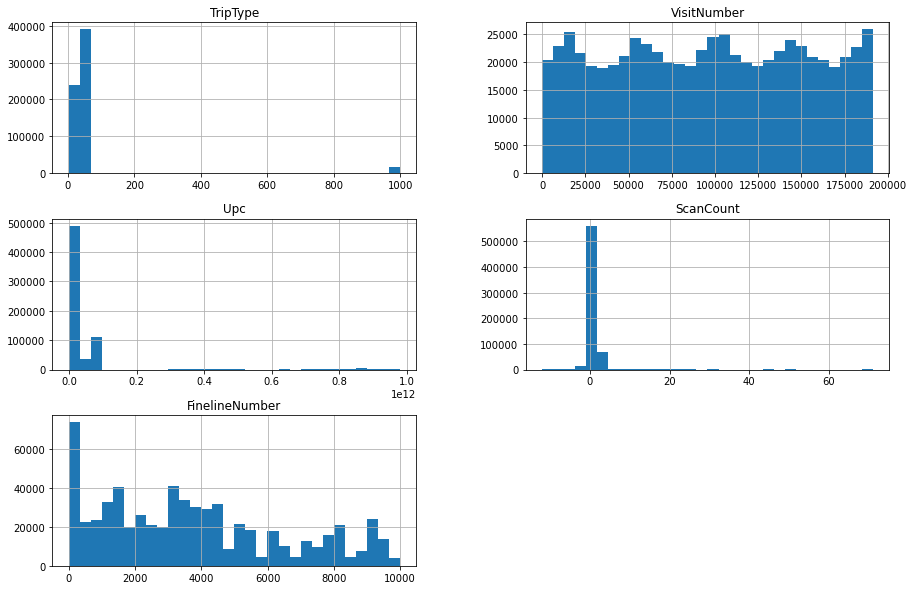

In [30]:
#Plotting histograms of all numerical variables
data.hist(bins=30, figsize=(15, 10))

In [31]:
for col in data: print(f"{col}: {len(data[col].unique())}")

TripType: 38
VisitNumber: 95674
Weekday: 7
Upc: 97715
ScanCount: 39
DepartmentDescription: 69
FinelineNumber: 5196


In [32]:
#Outlier removal 

#Trip Type: 38 Unique values are consistent with descritption in competition
#VisitNumber, Weekday and Upc, DepartmentDescription, Fineline Number should be fine
#ScanCount seems to be fine. Maybe setting all values <-1 to -1 could improve model performance (Check if all trips where
#Scan Count <=-1 are of the same type)
print(data.loc[:,"TripType"][data.ScanCount <= -1].unique().shape) #All trip types are included

(38,)


In [58]:
data['NPurchases'] = 0
NPurchases = data["VisitNumber"].value_counts()
data["NPurchases"] = [NPurchases[i] for i in data["VisitNumber"]]

#for i in data["VisitNumber"].unique():
#    data.loc[:,"NPurchases"][data["VisitNumber"]==i] = NPurchases[i]

C:\Users\max\AppData\Local\Temp/ipykernel_1572/3875705322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,"NPurchases"][data["VisitNumber"]==7] =3


In [ ]:
# (Potential) To - Do
# 1 Group together the rows with the same visit number. How?
    #1.1 (Preferred) Leave the absolute number of rows, but include two new columns (number of buys done on trip & total number of items purchased)
    #1.2 Put all into one row and create new features with lists (e.g. of items bought); will be hard to implement in model. 
    #     Also probably not what they want to have predicted
# 2 Find method to reduce number of unique values of Upc and potentially Fineline Number as well (not sure how to do it)
# 3 Think of feature engineering
    #Dummy for weekend (maybe begin and of week), somehow cyclical representation of days of week with sin/cos?
    #Dummy of luxury products (such products that are typically only bought in small amounts)
    #Dummy if number of things bought in one trip or of one product exceeds certain limit, dummy if both occurs
    #Further categorizing of products, which might be correlated with some sorts of shopping trip

In [ ]:
#Think of
#Splitting of data into train, val and test needs to be done before any feature engineering because of data leakage